In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Identifying handwritten numbers

In [3]:
# Download data and store train and test tuples

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Reshape and rescale train and test set

x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))
print(x_train.shape)
x_test.shape

x_train = x_train / 255
x_test = x_test / 255

(60000, 784)


In [6]:
# convert train and testset labels to two new variables

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
# Create multilayer perceptron model

model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(), metrics = 'accuracy')

In [10]:
# fit model

history = model.fit(x_train, y_train, batch_size = 128, epochs = 12, verbose = 1, validation_split = 0.2)

Epoch 1/12
375/375 [==============================] - 3s 6ms/step - loss: 0.4004 - accuracy: 0.8852 - val_loss: 0.2884 - val_accuracy: 0.9209
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.3081 - accuracy: 0.9133 - val_loss: 0.3077 - val_accuracy: 0.9096
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2947 - accuracy: 0.9179 - val_loss: 0.3014 - val_accuracy: 0.9176
Epoch 4/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2861 - accuracy: 0.9197 - val_loss: 0.2862 - val_accuracy: 0.9215
Epoch 5/12
375/375 [==============================] - 3s 7ms/step - loss: 0.2822 - accuracy: 0.9219 - val_loss: 0.2752 - val_accuracy: 0.9244
Epoch 6/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2763 - accuracy: 0.9227 - val_loss: 0.2814 - val_accuracy: 0.9226
Epoch 7/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2751 - accuracy: 0.9228 - val_loss: 0.2749 - val_accuracy: 0.9247
Epoch 

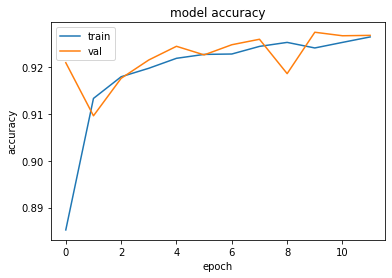

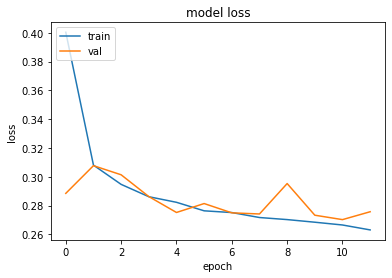

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(loss)
print(accuracy)

0.2852637767791748
0.9229000210762024


In [13]:
# Create multilayer perceptron model with relu activation function

model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape = (784,), activation = "relu"))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

## Deep convulational networks